In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
pwd

'/content'

In [7]:
df = pd.read_csv(r'data.csv')
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [9]:
df.shape

(200, 4)

In [10]:
# checking for 'nan' values

df.isna().sum()

feature1    0
feature2    0
feature3    0
target      0
dtype: int64

In [12]:
X = df.drop(['target'], axis=1)
y = df['target']


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=1)

In [14]:
X_train

,feature1,feature2,feature3
116,0.881301,0.556443,-0.924294
67,1.500890,-0.870159,-0.006299
78,1.486148,0.236716,-0.205650
42,0.743637,0.136132,0.141811
17,-1.473943,2.019651,-0.028786
...,...,...,...
133,-1.886837,0.096594,0.254388
137,0.680627,-0.669503,1.339148
72,-0.457261,0.859284,-0.478365
140,-0.837631,1.839152,0.616578


In [15]:
X_test

,feature1,feature2,feature3
58,-0.834240,1.344992,0.486249
40,0.627474,-0.053948,2.711926
34,0.128008,1.241617,0.088415
102,-0.412956,1.277274,0.256222
184,1.869508,0.665905,-0.337509
198,-0.914822,-0.897140,-0.784205
95,-0.416198,0.724658,-0.189072
4,1.167882,-0.024104,0.145063
29,-0.384663,0.043659,0.380335
168,0.138015,0.939503,0.343795


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(7, input_dim=3, activation='relu'))

model.add(Dense(1, activation='linear'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 28        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [23]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
4/4 [==============================] - 7s 59ms/step - loss: 74.9347 - val_loss: 93.6396
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 74.9237 - val_loss: 93.6259
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 74.9126 - val_loss: 93.6122
Epoch 4/10
4/4 [==============================] - 0s 10ms/step - loss: 74.9016 - val_loss: 93.5987
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 74.8919 - val_loss: 93.5848
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 74.8806 - val_loss: 93.5709
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 74.8700 - val_loss: 93.5568
Epoch 8/10
4/4 [==============================] - 0s 10ms/step - loss: 74.8591 - val_loss: 93.5431
Epoch 9/10
4/4 [==============================] - 0s 10ms/step - loss: 74.8477 - val_loss: 93.5295
Epoch 10/10
4/4 [==============================] - 0s 16ms/step - loss: 74.8372 - val_loss: 93.5151


In [24]:
y_pred=model.predict(X_test_scaled)

2/2 [==============================] - 0s 5ms/step


In [25]:
import sklearn
from sklearn.metrics import r2_score

**To improve R2 score, increase epochs from 10 to 100 and add one more Hidden layer.**

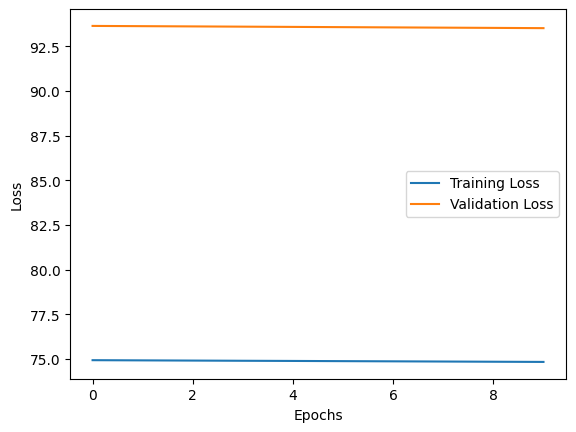

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()
